## 라이브러리 임포트

In [1]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# torch
import torch 

In [4]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [5]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# tqdm
from tqdm import tqdm

In [8]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [9]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [10]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
import re

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [17]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [21]:
# 파일 경로
file_path = r"C:\Users\wonny\OneDrive\문서\카카오톡 받은 파일\music 11000.csv"

# 데이터 로드
df = pd.read_csv(file_path)

In [22]:
df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword
0,uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,10,Love The Way You Lie|Eminem|Rihanna|Recovery|M...,2987149992,14605627,0,635964,https://i.ytimg.com/vi/uelHwf8o7_U/default.jpg,5.08,hip hop
1,5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,10,50 CENT|50 CENT IN DA CLUB|IN DA CLUB|IN DA CL...,2390681337,13992025,0,375904,https://i.ytimg.com/vi/5qm8PH4xAss/default.jpg,16.06,hip hop
2,8WYHDfJDPDc,Nelly - Dilemma (Official Music Video) ft. Kel...,NellyVEVO,10,NELLY DILEMMA|DILEMMA|DILEMMA NELLY|DILEMMA of...,1724349309,8857593,0,203244,https://i.ytimg.com/vi/8WYHDfJDPDc/default.jpg,5.10,hip hop
3,6EEW-9NDM5k,Akon - Lonely (Official Music Video),AkonVEVO,10,AKON|AKON LONELY|LONELY|LONELY AKON|LONELY off...,1228098563,10929063,0,322468,https://i.ytimg.com/vi/6EEW-9NDM5k/default.jpg,17.06,hip hop
4,oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,10,killing me softly|fugees|fugees killing me sof...,688270605,4019948,0,63910,https://i.ytimg.com/vi/oKOtzIo-uYw/default.jpg,27.03,hip hop


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        10950 non-null  object 
 1   title           10950 non-null  object 
 2   channel_title   10950 non-null  object 
 3   category_id     10950 non-null  int64  
 4   tags            10950 non-null  object 
 5   views           10950 non-null  int64  
 6   likes           10950 non-null  int64  
 7   dislikes        10950 non-null  int64  
 8   comment_count   10950 non-null  int64  
 9   thumbnail_link  10950 non-null  object 
 10  date            10950 non-null  float64
 11  keyword         10950 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## Data preprocessing

### function definition

In [24]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [25]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [26]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [27]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

### target scaling

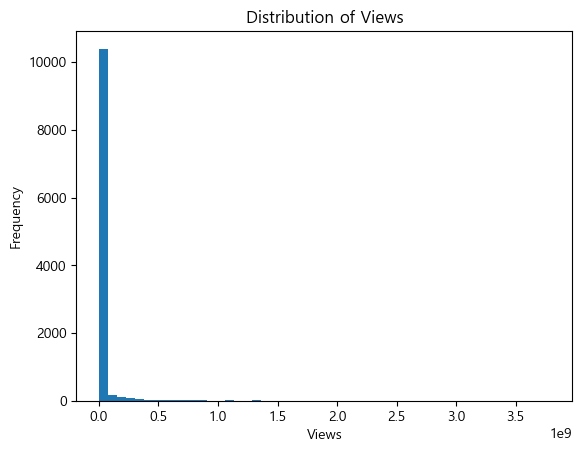

In [28]:
# target 분포 확인 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

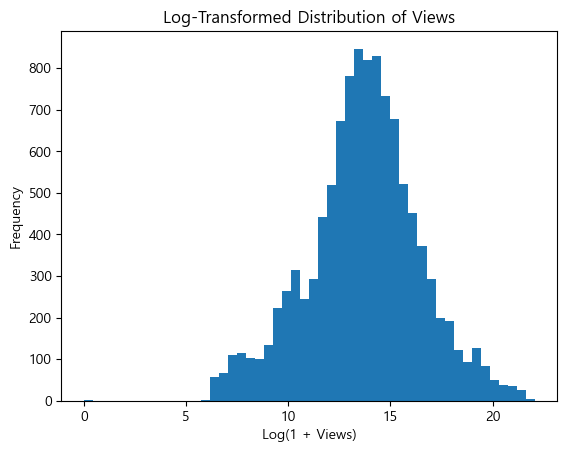

In [29]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [30]:
# log_views 열을 표준화
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

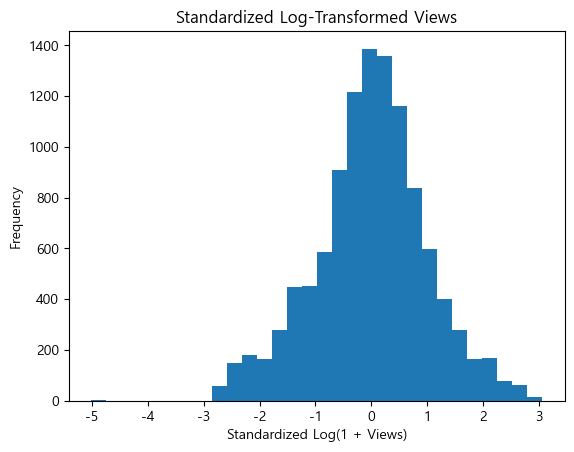

In [31]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### 제목 전처리 

In [32]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [33]:
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword,log_views,log_views_scaled,cleaned_title
0,uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,10,Love The Way You Lie|Eminem|Rihanna|Recovery|M...,2987149992,14605627,0,635964,https://i.ytimg.com/vi/uelHwf8o7_U/default.jpg,5.08,hip hop,21.817586,2.980297,eminem love way lie ft rihanna
1,5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,10,50 CENT|50 CENT IN DA CLUB|IN DA CLUB|IN DA CL...,2390681337,13992025,0,375904,https://i.ytimg.com/vi/5qm8PH4xAss/default.jpg,16.06,hip hop,21.594844,2.898704,cent da club official music video
2,8WYHDfJDPDc,Nelly - Dilemma (Official Music Video) ft. Kel...,NellyVEVO,10,NELLY DILEMMA|DILEMMA|DILEMMA NELLY|DILEMMA of...,1724349309,8857593,0,203244,https://i.ytimg.com/vi/8WYHDfJDPDc/default.jpg,5.10,hip hop,21.268116,2.779018,nelly dilemma official music video ft kelly ro...
3,6EEW-9NDM5k,Akon - Lonely (Official Music Video),AkonVEVO,10,AKON|AKON LONELY|LONELY|LONELY AKON|LONELY off...,1228098563,10929063,0,322468,https://i.ytimg.com/vi/6EEW-9NDM5k/default.jpg,17.06,hip hop,20.928733,2.654697,akon lonely official music video
4,oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,10,killing me softly|fugees|fugees killing me sof...,688270605,4019948,0,63910,https://i.ytimg.com/vi/oKOtzIo-uYw/default.jpg,27.03,hip hop,20.349693,2.442585,fugee kill softly song official video


### 품사별 count

In [34]:
# 각 제목에서 품사별 개수 추출
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# 기존 df와 합치기
df = pd.concat([df, pos_df], axis=1)

In [35]:
df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,keyword,log_views,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM
0,uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,10,Love The Way You Lie|Eminem|Rihanna|Recovery|M...,2987149992,14605627,0,635964,https://i.ytimg.com/vi/uelHwf8o7_U/default.jpg,...,hip hop,21.817586,2.980297,eminem love way lie ft rihanna,1,5,0,1,0,0
1,5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,10,50 CENT|50 CENT IN DA CLUB|IN DA CLUB|IN DA CL...,2390681337,13992025,0,375904,https://i.ytimg.com/vi/5qm8PH4xAss/default.jpg,...,hip hop,21.594844,2.898704,cent da club official music video,4,1,1,0,0,1
2,8WYHDfJDPDc,Nelly - Dilemma (Official Music Video) ft. Kel...,NellyVEVO,10,NELLY DILEMMA|DILEMMA|DILEMMA NELLY|DILEMMA of...,1724349309,8857593,0,203244,https://i.ytimg.com/vi/8WYHDfJDPDc/default.jpg,...,hip hop,21.268116,2.779018,nelly dilemma official music video ft kelly ro...,3,4,1,0,0,0
3,6EEW-9NDM5k,Akon - Lonely (Official Music Video),AkonVEVO,10,AKON|AKON LONELY|LONELY|LONELY AKON|LONELY off...,1228098563,10929063,0,322468,https://i.ytimg.com/vi/6EEW-9NDM5k/default.jpg,...,hip hop,20.928733,2.654697,akon lonely official music video,2,1,2,0,0,0
4,oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,10,killing me softly|fugees|fugees killing me sof...,688270605,4019948,0,63910,https://i.ytimg.com/vi/oKOtzIo-uYw/default.jpg,...,hip hop,20.349693,2.442585,fugee kill softly song official video,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,-0r4qArVRmc,MOST Streamed Features On Rap Songs,Fiscoos elevated music opinions,10,rap|hiphop|music|song|review|rating|ranking|fi...,265041,10320,0,326,https://i.ytimg.com/vi/-0r4qArVRmc/default.jpg,...,rap music,12.487644,-0.437407,stream feature rap song,3,0,0,1,0,0
10946,VASVCQp58HE,This Weeks MOST Streamed Rap Songs,Fiscoos elevated music opinions,10,rap|hiphop|music|song|review|rating|ranking|fi...,261442,11979,0,769,https://i.ytimg.com/vi/VASVCQp58HE/default.jpg,...,rap music,12.473972,-0.442415,week stream rap song,3,0,0,1,0,0
10947,X6sbpyDPwbI,"INDIAN TYPE BEAT ""त्रिकाल"" | FREESTYLE RAP BEA...",श्रवण,10,[none],146945,0,0,56,https://i.ytimg.com/vi/X6sbpyDPwbI/default.jpg,...,rap music,11.897820,-0.653468,indian type beat freestyle rap beat raphiphop ...,6,4,0,1,1,1
10948,esrD9C3FdKU,2021 VS 2022 BIGGEST Rap Songs,Fiscoos elevated music opinions,10,rap|hiphop|music|song|review|rating|ranking|fi...,241030,9076,0,366,https://i.ytimg.com/vi/esrD9C3FdKU/default.jpg,...,rap music,12.392681,-0.472193,big rap song,2,0,1,0,0,2


### 조회수 상위 영상에서 자주 등장하는 단어 확인

--------------------------------------------------------------------------------------------------------

조회수가 높은 영상들에서 자주 등장하는 단어 확인하기 (tf-idf)

In [36]:
# 조회수 기준 상위 영상 vs 하위 영상 비교 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [37]:
## tf-idf
# 벡터화 객체 생성
vectorizer = TfidfVectorizer(
    stop_words='english',      # 영어 불용어 제거
    max_features=1000,         # 상위 5000개의 단어만 사용
    ngram_range=(1, 2)         # unigram + bigram 사용
)

In [38]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

In [39]:
# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 30개 단어 보기
print(tfidf_df.head(30))

               word      score
907           video  82.382620
660        official  79.065190
627           music  65.510245
644     music video  54.067947
666  official video  50.226488
664  official music  48.287669
690           piano  23.619155
648              mv  18.549263
436              ft  16.504672
473              hd  15.829476
581            love  14.920044
748           relax  14.886663
71           ballad  14.726277
835            song  14.049541
589           lyric  14.007510
772            rock  12.910454
417            feat  12.715799
735             rap  12.684456
487             hop  12.068384
484         hip hop  12.068384
483             hip  12.068384
452            good  11.542126
557             lil  11.144739
514            jazz  10.603436
572            lofi  10.591728
78             beat  10.359994
662     official hd  10.070954
542            know   9.303937
569            live   8.926077
728           radio   8.368945


-----------------------------------------------------------------------------------------------------------

전체 데이터에서 출현 빈도가 높은 단어들 확인하기 (countvectorizer) 

In [40]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# 단어별 빈도 계산
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# 정리
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [41]:
count_df[count_df['count']>50]

,word,count
925,video,423
644,music,414
687,official,401
702,piano,117
729,relax,79
295,ft,59


----------------------------------------------------------------------------------------------------------

In [42]:

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [43]:
df['has_rank_related'].sum()

np.int64(1061)

### 조회수 상위 / 하위 영상 비교 

In [44]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

          word  score
925      video    423
644      music    414
687   official    401
702      piano    117
729      relax     79
295         ft     59
368        hip     50
377        hop     50
353         hd     46
425       jazz     46
721        rap     45
783       song     44
60        beat     39
321       good     38
652         mv     36
575      lyric     35
61   beautiful     35
719      radio     34
559       love     34
537        lil     33
742       rock     32
551       lofi     32
546       live     30
56      ballad     30
262       feat     29
688        old     28
709       play     27
774      sleep     26
222        edm     26
806      study     26


In [45]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

          word  score
579      music   3815
816       song   1296
424       jazz   1196
654      piano   1167
561        mix    969
238        edm    967
370        hip    911
381        hop    902
719      relax    880
745       rock    854
937      video    832
787      short    788
62      ballad    782
624   official    713
330       good    705
671   playlist    669
505       lofi    622
158  classical    618
605        nhc    597
700        rap    565
706         rb    545
402      india    475
139      chill    449
608        nht    415
714     realme    405
725      remix    405
213         dj    392
23      amazon    383
193      dance    382
513       love    380


### clustering

In [60]:
## 클러스터링 
titles = df['cleaned_title']

#TF-IDF 벡터화
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#단어 벡터 추출 (문서-단어 행렬 전치 → 단어 x 문서 행렬)
X_words = X_tfidf.T

#KMeans 클러스터링
n_clusters = 9  # 군집 수는 실험하면서 조정 가능
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#클러스터 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#클러스터별 단어 리스트 확인
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#클러스터별 단어 출력
for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

📌 Cluster 0:
music, music video, official, official music, video
--------------------------------------------------
📌 Cluster 1:
rap
--------------------------------------------------
📌 Cluster 2:
indie, indie music, indiemusic, newmusic
--------------------------------------------------
📌 Cluster 3:
aaliyah, acdc, acoustic, ad, adnan, aerosmith, aespa, aesthetic, afrobeat, ai, air, akon, alan, alan walker, album, allbum, alternative, alternative rock, amazing, amazon, amazon player, ambience, ambience jazz, ambience relax, ambience smooth, angelina, angelina jolie, anh, animation, anime, anthem, april, apt, arora, arora realme, artist, artist fyp, audio, aur, automobile, baby, babymonster, bach, background, background music, bad, ballad cover, ballad hot, ballad nh, ballad su, ballad vit, ballad xu, band, bar, bass, bass boost, battle, beat, beautiful, beautiful classical, beautiful piano, beautiful relax, bedroom, bedroom playlist, bee, beethoven, beethoven chopin, beethoven mozart, 

In [61]:
#제목, 단어 클러스터, 조회수 데이터 준비
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # 단어 → 클러스터번호

#제목별 포함된 클러스터 목록 만들기
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#각 클러스터 번호 기준으로 해당되는 조회수 모으기
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#평균 조회수 계산
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#결과 출력
for c, avg in sorted(cluster_avg_views.items()):
    print(f"📊 Cluster {c} - 평균 조회수: {round(avg):,}회")

📊 Cluster 0 - 평균 조회수: 38,472,330회
📊 Cluster 1 - 평균 조회수: 8,973,747회
📊 Cluster 2 - 평균 조회수: 1,849,748회
📊 Cluster 3 - 평균 조회수: 26,121,381회
📊 Cluster 4 - 평균 조회수: 4,690,096회
📊 Cluster 5 - 평균 조회수: 3,285,884회
📊 Cluster 6 - 평균 조회수: 4,129,046회
📊 Cluster 7 - 평균 조회수: 5,606,825회
📊 Cluster 8 - 평균 조회수: 2,826,862회


### 조회수 구간별 제목 길이 및 단어 수

In [48]:
# 단어 수 계산
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt
0,uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,10,Love The Way You Lie|Eminem|Rihanna|Recovery|M...,2987149992,14605627,0,635964,https://i.ytimg.com/vi/uelHwf8o7_U/default.jpg,...,2.980297,eminem love way lie ft rihanna,1,5,0,1,0,0,False,6
1,5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,10,50 CENT|50 CENT IN DA CLUB|IN DA CLUB|IN DA CL...,2390681337,13992025,0,375904,https://i.ytimg.com/vi/5qm8PH4xAss/default.jpg,...,2.898704,cent da club official music video,4,1,1,0,0,1,True,6
2,8WYHDfJDPDc,Nelly - Dilemma (Official Music Video) ft. Kel...,NellyVEVO,10,NELLY DILEMMA|DILEMMA|DILEMMA NELLY|DILEMMA of...,1724349309,8857593,0,203244,https://i.ytimg.com/vi/8WYHDfJDPDc/default.jpg,...,2.779018,nelly dilemma official music video ft kelly ro...,3,4,1,0,0,0,True,8
3,6EEW-9NDM5k,Akon - Lonely (Official Music Video),AkonVEVO,10,AKON|AKON LONELY|LONELY|LONELY AKON|LONELY off...,1228098563,10929063,0,322468,https://i.ytimg.com/vi/6EEW-9NDM5k/default.jpg,...,2.654697,akon lonely official music video,2,1,2,0,0,0,True,5
4,oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,10,killing me softly|fugees|fugees killing me sof...,688270605,4019948,0,63910,https://i.ytimg.com/vi/oKOtzIo-uYw/default.jpg,...,2.442585,fugee kill softly song official video,3,0,1,1,0,0,True,6


In [49]:
# 제목 길이 계산 
df['title_len'] = df['title'].apply(lambda x: len(x))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len
0,uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,10,Love The Way You Lie|Eminem|Rihanna|Recovery|M...,2987149992,14605627,0,635964,https://i.ytimg.com/vi/uelHwf8o7_U/default.jpg,...,eminem love way lie ft rihanna,1,5,0,1,0,0,False,6,41
1,5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,10,50 CENT|50 CENT IN DA CLUB|IN DA CLUB|IN DA CL...,2390681337,13992025,0,375904,https://i.ytimg.com/vi/5qm8PH4xAss/default.jpg,...,cent da club official music video,4,1,1,0,0,1,True,6,43
2,8WYHDfJDPDc,Nelly - Dilemma (Official Music Video) ft. Kel...,NellyVEVO,10,NELLY DILEMMA|DILEMMA|DILEMMA NELLY|DILEMMA of...,1724349309,8857593,0,203244,https://i.ytimg.com/vi/8WYHDfJDPDc/default.jpg,...,nelly dilemma official music video ft kelly ro...,3,4,1,0,0,0,True,8,56
3,6EEW-9NDM5k,Akon - Lonely (Official Music Video),AkonVEVO,10,AKON|AKON LONELY|LONELY|LONELY AKON|LONELY off...,1228098563,10929063,0,322468,https://i.ytimg.com/vi/6EEW-9NDM5k/default.jpg,...,akon lonely official music video,2,1,2,0,0,0,True,5,36
4,oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,10,killing me softly|fugees|fugees killing me sof...,688270605,4019948,0,63910,https://i.ytimg.com/vi/oKOtzIo-uYw/default.jpg,...,fugee kill softly song official video,3,0,1,1,0,0,True,6,57


-----------------------------------------------------------------------------------------------------------

조회수 구간별로 평균값에 차이가 있는지 확인

In [50]:
# 구간 5구간으로 분할 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [51]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   8.636712  1.094388e+05  74.652877
1         2   8.767123  1.125409e+06  72.393425
2         3   7.453425  7.726441e+07  62.318630


C:\Users\wonny\AppData\Local\Temp\ipykernel_6040\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


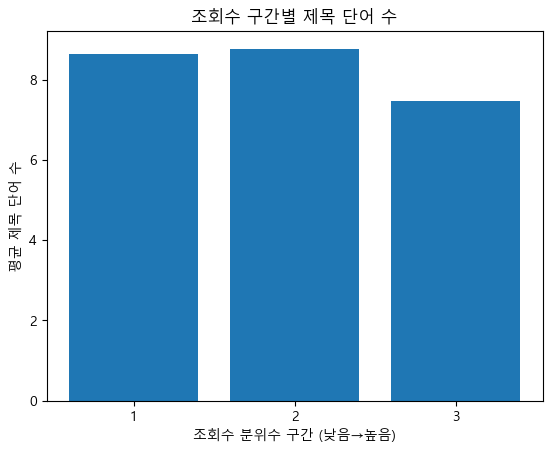

In [52]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 단어 수')
plt.show()

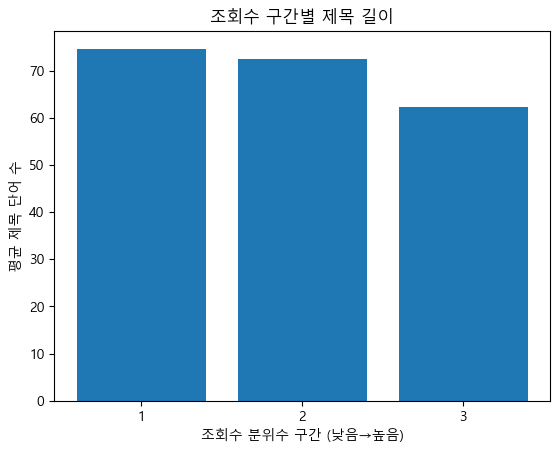

In [53]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 길이')
plt.show()

In [65]:
# 분위수 구간별로 title_cnt 분리
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA 테스트
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### description과 title에 겹치는 단어 있는지 확인

In [153]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len,views_bin
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0,True,7,65,3
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1,True,5,43,2
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0,True,8,72,1
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0,False,4,37,3


In [155]:
# 겹치는 단어 탐색
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# 개수까지 같이 세기
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# 조회수 구간에 따라 차이가 있는지 확인 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### 최종 예측

------------------------------------------------------------------------------------------------------

키워드 사전 구축

In [62]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
    "video", "music", "official", "piano", "relax", "ft", "music video", "official video",
    "official music", "mv", "hd", "love", "ballad", "song", "lyric", "rock", "feat", "rap",
    "hop", "hip hop", "hip", "good", "lil", "jazz", "lofi", "beat", "official hd", "know",
    "live", "radio"
]


hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

특징 추출 함수 정의

In [63]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 
    keywords = [
    "video", "music", "official", "piano", "relax", "ft", "music video", "official video",
    "official music", "mv", "hd", "love", "ballad", "song", "lyric", "rock", "feat", "rap",
    "hop", "hip hop", "hip", "good", "lil", "jazz", "lofi", "beat", "official hd", "know",
    "live", "radio"
]

    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


점수 계산 함수 정의

In [64]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

실제 적용할 데이터에서 사용할 칼럼만 불러오기

In [65]:
music = df[['title', 'views']].copy()

타겟 스케일링

In [66]:
# target scaling
music['log_views'] = np.log1p(music['views'])

scaler = StandardScaler()
music['scaled_views'] = scaler.fit_transform(music[['log_views']])

In [67]:
music = music.drop(columns = ['views', 'log_views'])
music

,title,scaled_views
0,Eminem - Love The Way You Lie ft. Rihanna,2.980297
1,50 Cent - In Da Club (Official Music Video),2.898704
2,Nelly - Dilemma (Official Music Video) ft. Kel...,2.779018
3,Akon - Lonely (Official Music Video),2.654697
4,Fugees - Killing Me Softly With His Song (Offi...,2.442585
...,...,...
10945,MOST Streamed Features On Rap Songs,-0.437407
10946,This Weeks MOST Streamed Rap Songs,-0.442415
10947,"INDIAN TYPE BEAT ""त्रिकाल"" | FREESTYLE RAP BEA...",-0.653468
10948,2021 VS 2022 BIGGEST Rap Songs,-0.472193


In [68]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10950 non-null  object 
 1   scaled_views  10950 non-null  float64
dtypes: float64(1), object(1)
memory usage: 171.2+ KB


함수 적용

In [70]:
music['features'] = music.apply(extract_features, axis=1)

In [71]:
music['rule_score'] = music['features'].apply(compute_rule_score)

### (예측 1) 지수함수로 예측

In [72]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [73]:
music['predicted_views'] = music['rule_score'].apply(score_to_views)

In [74]:
music[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

,title,scaled_views,rule_score,predicted_views
6950,Major Lazer & DJ Snake - Lean On (feat. MØ) [O...,3.067309,-0.27,91393
1000,Major Lazer & DJ Snake - Lean On (feat. MØ) [O...,3.067290,-0.27,91393
5950,Eminem - Love The Way You Lie ft. Rihanna,2.980317,-1.43,62084
0,Eminem - Love The Way You Lie ft. Rihanna,2.980297,-1.43,62084
10450,50 Cent - In Da Club (Official Music Video),2.898755,1.21,149680


In [75]:
# 예측값을 log-scaling + standardization한 것과 맞추려면:
pred_scaled = np.log1p(music['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# 실제값
true_scaled = music['scaled_views']

In [76]:
rmse = mean_squared_error(music['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 1.4248
R²: -1.0301


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (예측 2) Linear Regression

In [77]:
# X, y 정의
X = music[['rule_score']]  # 독립 변수: rule 기반 점수
y = music['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9999
R²: 0.0002


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


가중치 수정을 위한 회귀계수 확인

In [78]:
# 피처 추출
features_df = music.apply(extract_features, axis=1, result_type='expand')

# 독립변수(X), 종속변수(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = music['scaled_views']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 결과 출력
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

# 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (계수):")
print(coefficients)

RMSE: 0.9617
R²: 0.0751

 Feature Importance (계수):
INTJ                 -0.155894
is_caps_heavy         0.154801
num_questions        -0.144755
starts_with_number    0.137014
has_keyword          -0.077294
title_cnt             0.055644
VERB                 -0.036991
has_number            0.029782
num_exclamations     -0.022538
NOUN                 -0.019764
PROPN                -0.018328
title_len            -0.013627
ADJ                  -0.011633
NUM                   0.010952
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

점수 가중치 수정 후 다시 예측

In [54]:
def compute_rule_score_modified(features):
    score = 0

    # 1. 제목 길이 (계수: -0.014342 → 아주 미미한 영향)
    score -= 0.01 * features['title_len']

    # 2. 단어 수 (계수: +0.060302 → 약한 가산점)
    score += 0.06 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수 (계수: -0.009336, -0.075288 → 약한 감점)
    score -= 0.01 * features['num_exclamations']
    score -= 0.08 * features['num_questions']

    # 4. 숫자 포함 여부 (계수: -0.044869 → 보통 수준의 감점)
    score -= 0.05 * features['has_number']

    # 5. 숫자로 시작 (계수: -0.150011 → 상당한 감점)
    score -= 0.15 * features['starts_with_number']

    # 6. 키워드 포함 여부 (계수: -0.305676 → 가장 큰 감점)
    score -= 0.3 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우 (계수: -0.084076 → 중간 감점)
    score -= 0.08 * features['is_caps_heavy']

    # 8. 품사 기반
    score += 0.004 * features.get('NOUN', 0)      # 계수: +0.003710
    score += 0.001 * features.get('VERB', 0)      # 계수: +0.000971
    score += 0.03  * features.get('PROPN', 0)     # 계수: +0.026333 → 일반성↓로 감점
    score += 0.03  * features.get('ADJ', 0)       # 계수: +0.028304
    score -= 0.03  * features.get('NUM', 0)       # 계수: -0.031750
    score -= 0.08  * features.get('INTJ', 0)      # 계수: -0.084877

    return score


In [79]:
music['rule_score_modified'] = music['features'].apply(compute_rule_score_modified)

In [80]:
# X, y 정의
X = music[['rule_score_modified']]  # 독립 변수: rule 기반 점수
y = music['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9939
R²: 0.0122


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
